<a href="https://colab.research.google.com/github/Nooralsiyabi/21S21226-Noor/blob/main/elephant_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/elephant_dataset/train'
test_dir = '/content/drive/MyDrive/elephant_dataset/test'

In [9]:
import os
print("Training - African:", len(os.listdir('/content/drive/MyDrive/elephant_dataset/train/African')))
print("Training - Asian:", len(os.listdir('/content/drive/MyDrive/elephant_dataset/train/Asian')))
print("Testing - African:", len(os.listdir('/content/drive/MyDrive/elephant_dataset/test/African')))
print("Testing - Asian:", len(os.listdir('/content/drive/MyDrive/elephant_dataset/test/Asian')))

Training - African: 420
Training - Asian: 420
Testing - African: 97
Testing - Asian: 91


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [13]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [16]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.5097 - loss: 0.9480 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.5574 - loss: 0.6816 - val_accuracy: 0.5298 - val_loss: 0.7315
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.6690 - loss: 0.6361 - val_accuracy: 0.5298 - val_loss: 0.9713
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.6647 - loss: 0.6100 - val_accuracy: 0.5476 - val_loss: 0.7994
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.7997 - loss: 0.4471 - val_accuracy: 0.5357 - val_loss: 0.8155
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 119s 6s/step - accuracy: 0.8426 - loss: 0.4027 - val_accuracy: 0.5000 - val_loss: 0.8984
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.8523 - loss: 0.3600 - val_accuracy: 0.5476 - val_loss: 1.1256
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.8658 - loss: 0.2674 - val_accuracy: 0.5238 - v

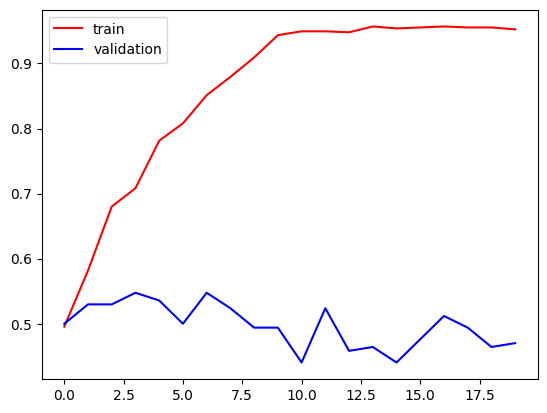

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

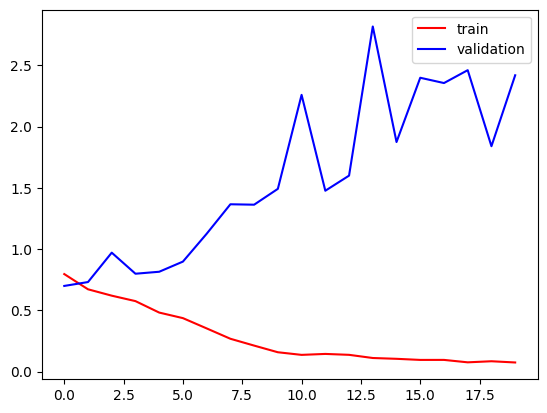

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [20]:
#predict the test data
predictions = model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[48 49]
 [36 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53        97
           1       0.53      0.60      0.56        91

    accuracy                           0.55       188
   macro avg       0.55      0.55      0.55       188
weighted avg       0.55      0.55      0.55       188



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [22]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 173s 8s/step - accuracy: 0.4899 - loss: 6.2765 - val_accuracy: 0.5476 - val_loss: 2.1704
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.6268 - loss: 4.0687 - val_accuracy: 0.5119 - val_loss: 3.8348
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.6775 - loss: 3.2401 - val_accuracy: 0.4940 - val_loss: 10.5165
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 164s 8s/step - accuracy: 0.6545 - loss: 2.5511 - val_accuracy: 0.4940 - val_loss: 10.8338
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.6648 - loss: 2.4770 - val_accuracy: 0.5119 - val_loss: 6.7643
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.6961 - loss: 1.5040 - val_accuracy: 0.5060 - val_loss: 4.2281
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.7443 - loss: 1.2770 - val_accuracy: 0.5238 - val_loss: 3.3841
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 164s 8s/step - accuracy: 0.7303 - loss: 1.0234 - val_accuracy: 0.4940 -

In [25]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [26]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[26 71]
 [31 60]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        97
           1       0.46      0.66      0.54        91

    accuracy                           0.46       188
   macro avg       0.46      0.46      0.44       188
weighted avg       0.46      0.46      0.44       188



Using Pre-trained model - Resnet

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 222s 10s/step - accuracy: 0.4867 - loss: 4.0461 - val_accuracy: 0.5000 - val_loss: 0.9083
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 208s 10s/step - accuracy: 0.5535 - loss: 0.7721 - val_accuracy: 0.5238 - val_loss: 0.6979
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 207s 10s/step - accuracy: 0.5255 - loss: 0.7319 - val_accuracy: 0.4821 - val_loss: 0.7368
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 206s 10s/step - accuracy: 0.5520 - loss: 0.7006 - val_accuracy: 0.5417 - val_loss: 0.6996
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 206s 10s/step - accuracy: 0.6239 - loss: 0.6453 - val_accuracy: 0.5000 - val_loss: 0.8695
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 209s 10s/step - accuracy: 0.5488 - loss: 0.7211 - val_accuracy: 0.5060 - val_loss: 0.8403
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 215s 10s/step - accuracy: 0.5301 - loss: 0.7228 - val_accuracy: 0.5000 - val_loss: 0.7908
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 254s 10s/step - accuracy: 0.6237 - loss: 0.6241 - val_accuracy: 0.

In [31]:
predictions = resnet_model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 8s/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[95  2]
 [83  8]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.53      0.98      0.69        97
           1       0.80      0.09      0.16        91

    accuracy                           0.55       188
   macro avg       0.67      0.53      0.42       188
weighted avg       0.66      0.55      0.43       188

